# 摘要

In [1]:
import pandas, os, numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



In [3]:
file_path = os.path.join(os.getcwd(), "TextFiles", "smsspamcollection.tsv")
text_df = pandas.read_csv(file_path, sep = "\t")

text_df["classification"] = 0
for index, row in text_df.iterrows() : 
    if row["label"] == "ham" : 
        text_df.at[index, "classification"] = 1
    


# 提取特徵變數

In [4]:
# 透過對 headline_text 的特徵進行觀測，
text_df


,label,message,length,punct,classification
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,1
1,ham,Ok lar... Joking wif u oni...,29,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,0
3,ham,U dun say so early hor... U c already then say...,49,6,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8,0
5568,ham,Will ü b going to esplanade fr home?,36,1,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7,1
5570,ham,The guy did some bitching but I acted like i'd...,125,1,1


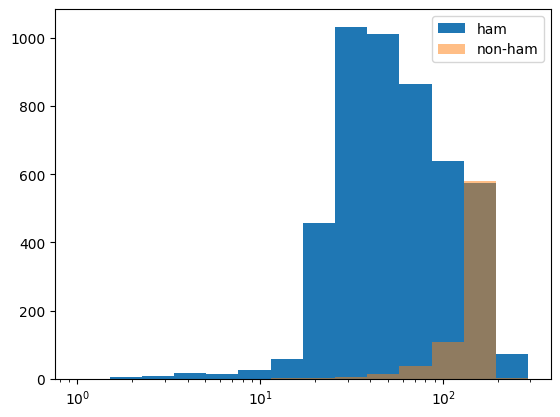

In [7]:
# 根據每段句子的長度，製圖。
fig = plt.figure(facecolor= "white")

# 繪製長方圖

# 畫圖
bins = 1.5**(numpy.arange(0, 15))

plt.xscale("log")
plt.hist(text_df[text_df["classification"] == 1]["length"], bins=bins)
plt.hist(text_df[text_df["classification"] == 0]["length"], bins=bins, alpha = 0.5)
plt.legend(("ham", "non-ham"))
plt.show()


In [26]:
# 由上圖所示，我們可以發現，部分垃圾郵件隨著信件的長度提升，變得越來越多。
# 所以我們根據信件的長度對資料集做分類，也許可以得到不錯的結果。

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(text_df[["length", "punct"]], text_df["classification"], test_size= 0.3, random_state=42)


In [27]:
X_train

,length,punct
708,49,6
4338,29,0
5029,67,1
4921,48,2
2592,44,3
...,...,...
3772,81,3
5191,22,2
5226,45,8
5390,26,0


# 模型建立

## 羅吉斯迴歸

In [28]:
# 採用羅吉斯回歸，試試看。
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression(solver= "lbfgs")
logis_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn import metrics
prediction = logis_model.predict(X_test)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
y_test

3245    1
944     1
1044    1
2484    1
812     1
       ..
2505    1
2525    0
4975    1
650     0
4463    1
Name: classification, Length: 1672, dtype: int64

In [34]:
# 用混淆矩陣，看看正確率如何。
print(metrics.confusion_matrix(y_test, prediction))

[[   5  219]
 [  44 1404]]


In [33]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.10      0.02      0.04       224
           1       0.87      0.97      0.91      1448

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [35]:
print(metrics.accuracy_score(y_test, prediction))

0.8427033492822966


# 分析結果以 word 形式輸出。